In [0]:
import torch 
import torch.nn as nn
import torchvision.datasets as dsets
from skimage import transform
import torchvision.transforms as transforms
from torch.autograd import Variable
import pandas as pd;
import numpy as np;
from torch.utils.data import Dataset, DataLoader
from vis.utils import *
import random;
import math;


In [0]:
num_epochs = 5;
batch_size = 100;
learning_rate = 0.001;

In [0]:
class FashionMNISTDataset(Dataset):
    '''Fashion MNIST Dataset'''
    def __init__(self, csv_file, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file
            transform (callable): Optional transform to apply to sample
        """
        
        data = pd.read_csv(csv_file);
        self.X = np.array(data.iloc[:, 1:]).reshape(-1, 1, 28, 28)#.astype(float);
        self.Y = np.array(data.iloc[:, 0]);
        
        del data;
        self.transform = transform;
        
    def __len__(self):
        return len(self.X);
    
    def __getitem__(self, idx):
        item = self.X[idx];
        label = self.Y[idx];
        
        if self.transform:
            item = self.transform(item);
        
        return (item, label);

In [8]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anish1207","key":"17b571dd19e5460073769b32e8176faf"}'}

In [9]:
!ls


kaggle.json  sample_data


In [10]:
!ls -lha kaggle.json



-rw-r--r-- 1 root root 65 Mar 10 12:40 kaggle.json


In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [13]:
!ls ~/.kaggle


kaggle.json


In [14]:
!kaggle datasets download -d zalando-research/fashionmnist

 81% 56.0M/68.8M [00:01<00:00, 29.5MB/s]
100% 68.8M/68.8M [00:01<00:00, 56.8MB/s]


In [15]:
!ls

fashionmnist.zip  kaggle.json  sample_data


In [16]:
!unzip fashionmnist.zip


Archive:  fashionmnist.zip
  inflating: t10k-images-idx3-ubyte  
  inflating: fashion-mnist_test.csv  
  inflating: train-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-labels-idx1-ubyte  


In [0]:
train_dataset = FashionMNISTDataset(csv_file='fashion-mnist_train.csv');
test_dataset = FashionMNISTDataset(csv_file='fashion-mnist_test.csv')

In [0]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True);
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=True);

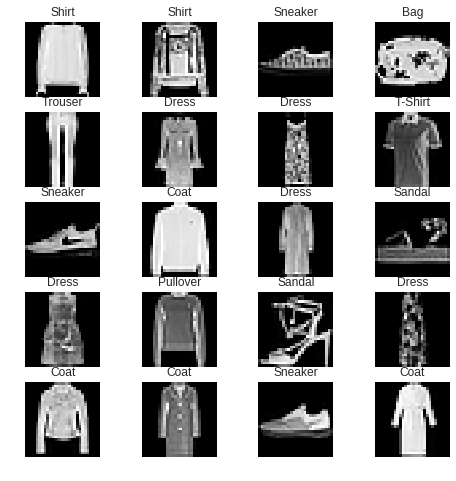

In [19]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'};
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8));
columns = 4;
rows = 5;
for i in range(1, columns*rows +1):
    img_xy = np.random.randint(len(train_dataset));
    img = train_dataset[img_xy][0][0,:,:]
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[train_dataset[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

In [0]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(7*7*32, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [0]:
#instance of the Conv Net
cnn = CNN();
#loss function and optimizer
criterion = nn.CrossEntropyLoss();
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate);

In [22]:
losses = [];
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.float())
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item());
        
        if (i+1) % 100 == 0:
            print ('Epoch : %d/%d, Iter : %d/%d,  Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.item()))

Epoch : 1/5, Iter : 100/600,  Loss: 0.4938
Epoch : 1/5, Iter : 200/600,  Loss: 0.3676
Epoch : 1/5, Iter : 300/600,  Loss: 0.2708
Epoch : 1/5, Iter : 400/600,  Loss: 0.3584
Epoch : 1/5, Iter : 500/600,  Loss: 0.4994
Epoch : 1/5, Iter : 600/600,  Loss: 0.2900
Epoch : 2/5, Iter : 100/600,  Loss: 0.3155
Epoch : 2/5, Iter : 200/600,  Loss: 0.2515
Epoch : 2/5, Iter : 300/600,  Loss: 0.3627
Epoch : 2/5, Iter : 400/600,  Loss: 0.3004
Epoch : 2/5, Iter : 500/600,  Loss: 0.3931
Epoch : 2/5, Iter : 600/600,  Loss: 0.1208
Epoch : 3/5, Iter : 100/600,  Loss: 0.2318
Epoch : 3/5, Iter : 200/600,  Loss: 0.3303
Epoch : 3/5, Iter : 300/600,  Loss: 0.2928
Epoch : 3/5, Iter : 400/600,  Loss: 0.3358
Epoch : 3/5, Iter : 500/600,  Loss: 0.3195
Epoch : 3/5, Iter : 600/600,  Loss: 0.2101
Epoch : 4/5, Iter : 100/600,  Loss: 0.2536
Epoch : 4/5, Iter : 200/600,  Loss: 0.2355
Epoch : 4/5, Iter : 300/600,  Loss: 0.2466
Epoch : 4/5, Iter : 400/600,  Loss: 0.1787
Epoch : 4/5, Iter : 500/600,  Loss: 0.1502
Epoch : 4/5

In [38]:
cnn.eval()
correct = 0
total = 0
count=0
for images, labels in test_loader:
    
    images = Variable(images.float())
    outputs = cnn(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    for i in range(100):
        if predicted[i]==1:
           count+=1
print('Test Accuracy of the model on the 10000 test images: %.4f %%' % (100 * correct / total))
print(count)

Test Accuracy of the model on the 10000 test images: 90.0000 %
994


In [50]:
cnn.eval()
correct = 0
total = 10000
tp=[0 for _ in range(10)]
fp=[0 for _ in range(10)]
fn=[0 for _ in range(10)]
for images, labels in test_loader:
    images = Variable(images.float())
    outputs = cnn(images)
    _, predicted = torch.max(outputs.data, 1)
    
    for i in range(100):
      if labels[i]==0 :
          if predicted[i]==0:
            tp[0]+=1
          else:
            fn[0]+=1
      elif labels[i]==1 :
          if predicted[i]==1:
            tp[1]+=1
          else:
            fn[1]+=1
      elif labels[i]==2 :
          if predicted[i]==2:
            tp[2]+=1
          else:
            fn[2]+=1
      elif labels[i]==3 :
          if predicted[i]==3:
            tp[3]+=1
          else:
            fn[3]+=1
      elif labels[i]==4 :
          if predicted[i]==4:
            tp[4]+=1
          else:
            fn[4]+=1
      elif labels[i]==5 :
          if predicted[i]==5:
            tp[5]+=1
          else:
            fn[5]+=1
      elif labels[i]==6 :
          if predicted[i]==6:
            tp[6]+=1
          else:
            fn[6]+=1
      elif labels[i]==7 :
          if predicted[i]==7:
            tp[7]+=1
          else:
            fn[7]+=1
      elif labels[i]==8 :
          if predicted[i]==8:
            tp[8]+=1
          else:
            fn[8]+=1
      elif labels[i]==9 :
          if predicted[i]==9:
            tp[9]+=1
          else:
            fn[9]+=1
      else:
          pass

      if predicted[i]==0 :
          if labels[i]!=0:
            fp[0]+=1
      elif predicted[i]==1:
          if labels[i]!=2:
            fp[1]+=1
      elif predicted[i]==2: 
          if labels[i]!=2:
            fp[2]+=1
      elif predicted[i]==3:
          if labels[i]!=3:
            fp[3]+=1
      elif predicted[i]==4:
          if labels[i]!=4:
            fp[4]+=1
      elif predicted[i]==5:
          if labels[i]!=5:
            fp[5]+=1
      elif predicted[i]==6:
          if labels[i]!=6:
            fp[6]+=1
      elif predicted[i]==7:
          if labels[i]!=7:
            fp[7]+=1
      elif predicted[i]==8:
          if labels[i]!=8:
            fp[8]+=1
      elif predicted[i]==9:
          if labels[i]!=9:
            fp[9]+=1
      else:
          pass
      
      
      #correct += (predicted[i] == labels[i]).sum()
      if predicted[i]==labels[i]:
        correct+=1
precision=[0 for _ in range(10)]
recall=[0 for _ in range(10)]
f1=[0 for _ in range(10)]

for i in range (10):
  precision[i]=tp[i]/(tp[i]+fp[i])
  recall[i]=tp[i]/(tp[i]+fn[i])
  f1[i]=2*(precision[i]*recall[i])/(precision[i]+recall[i])
  print("class ",i," precision : ",precision[i],"  recall : ",recall[i],"  f1 : ", f1[i])
  print("\n")

print('Test Accuracy of the model on the 10000 test images: %.4f %%' % (100 * correct / total))

class  0  precision :  0.7888307155322862   recall :  0.904   f1 :  0.8424976700838771


class  1  precision :  0.49797979797979797   recall :  0.986   f1 :  0.661744966442953


class  2  precision :  0.868   recall :  0.868   f1 :  0.868


class  3  precision :  0.9414784394250514   recall :  0.917   f1 :  0.9290780141843972


class  4  precision :  0.9100998890122086   recall :  0.82   f1 :  0.8627038400841661


class  5  precision :  0.9989094874591058   recall :  0.916   f1 :  0.9556598852373501


class  6  precision :  0.7412587412587412   recall :  0.742   f1 :  0.7416291854072963


class  7  precision :  0.9057301293900185   recall :  0.98   f1 :  0.9414024975984631


class  8  precision :  0.991869918699187   recall :  0.976   f1 :  0.9838709677419355


class  9  precision :  0.9660339660339661   recall :  0.967   f1 :  0.9665167416291853


Test Accuracy of the model on the 10000 test images: 90.7600 %
